In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Koppen

In [56]:
def koppen(P, T, lat, z = 0, Peel = True):
    
    data = pd.DataFrame(data = (P, T), index = ['P', 'T']).transpose()
    
    T = np.array(T)
    P = np.array(P)
    
    MAP = np.round(np.sum(P), 4)
    MAT = np.round(np.mean(T), 4)
    Thot = np.round(np.max(T), 4)
    Tcold = np.round(np.min(T), 4)
    Tmonth10 = np.round(sum(map(lambda x : x >= 10, T)), 4)
    Pdry = np.round(np.min(P), 4)
    
    if not Peel:
        seqT = np.array((T[0], T[1], T[2], T[3], T[4], T[5], T[6], T[7], T[8], T[9], T[10], T[11], T[0], T[1], T[2], T[3], T[4]))
        seqP = np.array((P[0], P[1], P[2], P[3], P[4], P[5], P[6], P[7], P[8], P[9], P[10], P[11], P[0], P[1], P[2], P[3], P[4]))
        data['seqT'] = np.convolve(seqT, np.ones(6, dtype=np.int), mode='valid')
        data['seqP'] = np.convolve(seqP, np.ones(6, dtype=np.int), mode='valid')
        
        s_st = data['seqT'].idxmax(axis = 1)
        s_f = s_st + 6
        w_st = s_f
        w_f = w_st + 6
        
        if s_f > 12:
            s_f = s_f - 12
        if w_f > 12:
            w_f = w_f - 12
        if s_st > 12:
            s_st = s_st - 12
        if w_st > 12:
            w_st = w_st - 12
        
        drymonth = data['P'].idxmin(axis = 1)
        season = []
        
        if s_st < s_f and w_st < w_f:
            Psdry = data['P'][(data.index >= s_st) & (data.index < s_f)].min()
            Pwdry = (data['P'][(data.index >= w_st) & (data.index < w_f)].min())
            Pswet = data['P'][(data.index >= s_st) & (data.index < s_f)].max()
            Pwwet = (data['P'][(data.index >= w_st) & (data.index < w_f)].max())
            if s_st < drymonth and s_f > drymonth:
                season.append('summer')
            else:
                season.append('winter')
        
        if s_st < s_f and w_st > w_f:
            Psdry = data['P'][(data.index >= s_st) & (data.index < s_f)].min()
            Pwdry = (data['P'][(data.index >= w_st)].min(), data['P'][(data.index < w_f)].min())
            Pwdry = np.min(Pwdry)
            Pswet = data['P'][(data.index >= s_st) & (data.index < s_f)].max()
            Pwwet = (data['P'][(data.index >= w_st)].max(), data['P'][(data.index < w_f)].max())
            Pwwet = np.max(Pwwet)
            if s_st < drymonth and s_f > drymonth:
                season.append('summer')
            else:
                season.append('winter')
        
        if s_st > s_f and w_st < w_f:
            Psdry = (data['P'][(data.index >= s_st)].min(), data['P'][(data.index < s_f)].min())
            Psdry = np.min(Psdry)
            Pwdry = (data['P'][(data.index >= w_st) & (data.index < w_f)].min())
            Pswet = (data['P'][(data.index >= s_st)].max(), data['P'][(data.index < s_f)].max())
            Pswet = np.max(Pswet)
            Pwwet = (data['P'][(data.index >= w_st) & (data.index < w_f)].max())
        
            if w_st < drymonth and w_f > drymonth:
                season.append('winter')
            else:
                season.append('summer')    
        
        if s_st < w_st:
            s_f = s_f - 1
            w_f = w_f - 1
        else:
            w_f = w_f - 1
            s_f = s_f - 1
    
        if w_st == 12:
            w_st = 0
            
        if 0.7 * MAP <= data['seqP'].loc[w_st]:
            Pthresh = 2 * MAT
        elif 0.7 * MAP <= data['seqP'].loc[s_st]:
            Pthresh = 2 * MAT + 28
        else:
            Pthresh = 2 * MAT + 14
    
    else:
        if lat > 0:
            # N
            winter = np.concatenate((P[0:3], P[9:12]))
            summer = P[3:9]
            Psdry = np.min(summer)
            Pwdry = np.min(winter)
            Pswet = np.max(summer)
            Pwwet = np.max(winter)
            s_st = 3
            s_f = 8
            mid_season = 'summer'
        else:
            #S
            winter = P[3:9]
            summer = np.concatenate((P[0:3], P[9:12]))
            Psdry = np.min(summer)
            Pwdry = np.min(winter)
            Pswet = np.max(summer)
            Pwwet = np.max(winter)
            s_st = 9
            s_f = 2
            mid_season = 'winter'
    
    if P[3:9].sum()/(MAP + 0.1) > 0.3 and  P[3:9].sum()/(MAP + 0.1) < 0.7:
        p1 = 2 * MAT + 14
    else:
        p1 = 0
    if lat < 0 or p1 != 0:
        p2 = 0
    else:
        if P[3:9].sum()/(MAP + 0.1) > 0.7:
            p2 = 2 * MAT + 28
        else:
            p2 = 2 * MAT
    if lat > 0 or p1 != 0:
        p3 = 0
    else:
        if P[3:9].sum()/(MAP + 0.1) > 0.7:
            p3 = 2 * MAT
        else:
            p3 = 2 * MAT + 28
            
    Pthresh = p1 + p2 + p3

    main_class = []

    if z >= 2300:
        if Thot >= 0:
            main_class.append('HT - Tundra')
        else:
            main_class.append('HF - Frost or Ice Cap')
    elif MAP < (10 * Pthresh):
        main_class.append('B')
    elif len(main_class) == 0 and not Tcold < 18:
        main_class.append('A')
    elif len(main_class) == 0 and Thot >= 10 and Tcold < 18 and Tcold > 0:
        main_class.append('C')
    elif len(main_class) == 0 and Thot >= 10 and Tcold <= 0:
        main_class.append('D')
    elif len(main_class) == 0 and Thot < 10:
        main_class.append('E')
    
    second_class = []
    
    if main_class[0] == 'A':
        if Pdry >= 60:
            second_class.append('f')
        else:
            if Pdry >= 100 - MAP / 25:
                second_class.append('m')
            elif Psdry < 100 - MAP / 25:
                second_class.append('s')
            elif Pwdry < 100 - MAP / 25:
                second_class.append('w')

    elif main_class[0] == 'B':
        if MAP < 5 * Pthresh:
            second_class.append('W')
        else:
            second_class.append('S')
        if MAT >= 18:
            second_class.append('h')
        else:
            second_class.append('k')

    elif main_class[0] == 'C':
        if Psdry < 40 and Psdry < Pwwet / 3:
            second_class.append('s')
        elif Pwdry < Pswet / 10:
            second_class.append('w')
        else:
            second_class.append('f')
        if Thot >= 22:
            second_class.append('a')
        elif Tmonth10 >= 4:
            second_class.append('b')
        elif 1 <= Tmonth10 and Tmonth10 < 4:
            second_class.append('c')
    
    if main_class[0] == 'D':
        if Psdry < 40 and Psdry < Pwwet / 3:
            second_class.append('s')
        elif Pwdry < Pswet / 10:
            second_class.append('w')
        else:
            second_class.append('f')
        if Thot >= 22:
            second_class.append('a')
        elif Tmonth10 >= 4:
            second_class.append('b')
        elif Tcold < -38:
            second_class.append('d')
        else:
            second_class.append('c')

    if main_class[0] == 'E':
        if Thot > 0:
            second_class.append('T')
        else:
            second_class.append('F')
    main_class = ''.join(main_class)
    second_class = ''.join(second_class)
    classification = main_class + second_class
    return classification, s_st, s_f

### Modality

In [57]:
def Modality(P):
    f0 = np.zeros(len(P))
    for i in range(len(P) - 1):
        f0[i] = (P[i - 1] - P[i]) * (P[i] - P[i + 1])
        f0[0] = (P[-1] - P[0]) * (P[0] - P[1])
        f0[-1] = (P[-2] - P[-1]) * (P[-1] - P[0])
    
    def zero_runs(a):
        # Create an array that is 1 where a is 0, and pad each end with an extra 0.
        iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
        absdiff = np.abs(np.diff(iszero))
        # Runs start and end where absdiff is 1.
        ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
        return ranges
    
    f_df = pd.DataFrame(f0, columns = ['f'])

    def classify(x):
        cl = np.zeros(len(x))
        for i in range(len(x)):
            if x[i] == 0:
                cl[i] = 0
            elif x[i] > 0:
                cl[i] = 1
            else:
                cl[i] = -1
        return cl
    
    f_df =  f_df.apply(classify)
    zeros = zero_runs(f_df['f'])
    if len(zeros) > 0:
        if zeros[-1][1] == 12 and zeros[0][0] == 0:
            zeros = np.insert(zeros, 0, [zeros[-1][0], zeros[0][1]], 0)
            zeros = np.delete(zeros, 1, 0)
            zeros = np.delete(zeros, -1, 0)
    f_df['P'] = P

    mod = np.zeros(len(P))  
    for i in range(len(P)):
        if f_df['f'].iloc[i] < 0 and f_df['P'].iloc[i - 1] < f_df['P'].iloc[i]:
            mod[i] = 1
    for i in range(len(zeros) - 1):
        if P[zeros[i][0] - 1] < P[zeros[i][0]] and P[zeros[i][0] + int(np.diff(zeros[i]))] < P[zeros[i][0]]:
            mod[zeros[i][0]] = 1
    for i in range(len(zeros)):
        if zeros[-1][1] == 12:
            if P[zeros[i][0] - 1] < P[zeros[i][0]] and P[0] < P[zeros[i][0]]:
                mod[zeros[i][0]] = 1
    for i in range(len(zeros)):
        zeros[i][0] = zeros[i][0] + 1

    f_df['modality'] = mod
    peak = []
    def peaks(f_df):
        for i in range(12):
            if f_df.iloc[i]['modality'] == 1:
                peak.append(i + 1)
        return peak
    
    peaks = np.array(peaks(f_df), dtype=np.int64)
    return mod, zeros, peaks

In [69]:
P = np.random.randint(0, 1000, 12)
T = np.random.randint(-40, 50, 12)
lat = -42

In [70]:
# If Peel = False --> summer and winter is moving

mod, flats, peak, kop = ([] for i in range(4))

if not P.min() < 0 and not T.max() > 50 and not T.min() < -50:
    mod.append(sum(Modality(P)[0]))
    flats.append(Modality(P)[1])
    peak.append(Modality(P)[2])

mod = np.array(mod)
flats = np.array(flats).ravel()
peak = np.array(peak).ravel()

kop, sst, sf = koppen(P, T, lat, z = 0, Peel = False)

Multimodal & rest
Peaks: [ 2  5  7 10]
Koppen class: Dfa


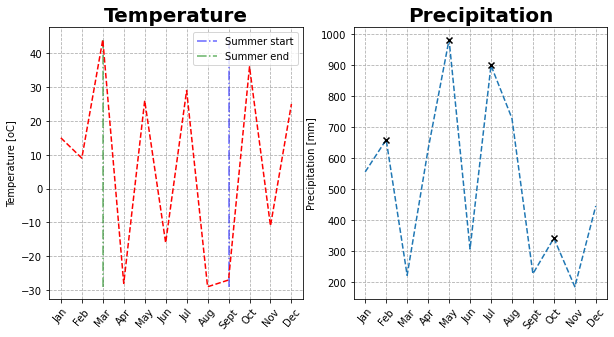

In [71]:
if mod.sum() == 0:
    text = 'Non-modal'
if mod.sum() == 1:
    text = 'Unimodal'
if mod.sum() == 2:
    text = 'Bimodal'
if mod.sum() == 3:
    text = 'Trimodal'
if mod.sum() > 3:
    text = 'Multimodal & rest'
print(text)
peaky = f'Peaks: {peak}'

if mod.any() > 0:
    print(peaky)
if len(flats) > 0:
    flaty = f'Flats: {flats}'
    print(flaty)

print('Koppen class: {}'.format(kop))

fig=plt.figure(figsize = (10, 5))
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')

plt.subplot(121)
plt.title('Temperature', fontsize=20, fontweight='bold');
plt.plot(months, T, 'r--');
plt.ylabel('Temperature [oC]')
plt.xticks(rotation = 50)
plt.vlines(sst-1, T.min(), T.max(), 'blue', ls = '-.', alpha = 0.6, label = 'Summer start')
# plt.text(sst + 0.5, np.mean([T.max(), T.min()]),'Summer start', rotation=90)
plt.vlines(sf, T.min(), T.max(), 'green', ls = '-.', alpha = 0.6, label = 'Summer end')
# plt.text(sf + 0.5, np.mean([T.max(), T.min()]),'Summer end',rotation=90)
plt.grid(ls = '--')
plt.legend();

plt.subplot(122)
plt.title('Precipitation', fontsize=20, fontweight='bold');
plt.plot(months, P, ls = '--')
for i in peak:
    plt.scatter(i - 1, P[i-1], zorder = 10, color = 'black', marker = 'x')
plt.ylabel('Precipitation [mm]')
plt.xticks(rotation = 50)
plt.grid(ls = '--');